# FACTS devices: Static Var Compensator

We implement the FACTS devices based on the PhD Thesis of Ara Panosyan, PhD.

We reproduce the case study from the PhD Thesis using the following grid model:

![title](facts/facts_case_study_grid.png)

In [95]:
import pandas as pd
import pandapower as pp
from pandapower.test.loadflow.test_facts import facts_case_study_grid
import os
import numpy as np
import tempfile

from pandapower.timeseries import DFData
from pandapower.timeseries import OutputWriter
from pandapower.timeseries.run_time_series import run_timeseries
from pandapower.control import ConstControl

In [96]:
net = facts_case_study_grid()

In [97]:
#### define and prepare the generation and loads profiles.

wind_profile = pd.read_csv(r"facts/facts_case_study_wind_profile.csv", index_col=0)

In [98]:
time_steps = wind_profile.index.values

In [99]:
wind_ds = DFData(wind_profile)

In [100]:
ConstControl(net, element='gen', variable='p_mw', element_index=net.gen.index,
             data_source=wind_ds, profile_name=["wind_power_mw"])

This ConstControl has the following parameters: 

index:             0
json_excludes:     ['self', '__class__']

In [101]:
ow = OutputWriter(net, time_steps, output_path=None)
ow.log_variable("res_bus", "vm_pu")

In [102]:
run_timeseries(net, time_steps, continue_on_divergence=False)

hp.pandapower.auxiliary - WARNING: numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

  0%|                                                                                           | 0/96 [00:00<?, ?it/s]hp.pandapower.auxiliary - WARNING: numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

100%|█████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 105.55it/s]


In [103]:
vm_pu = ow.output["res_bus.vm_pu"]

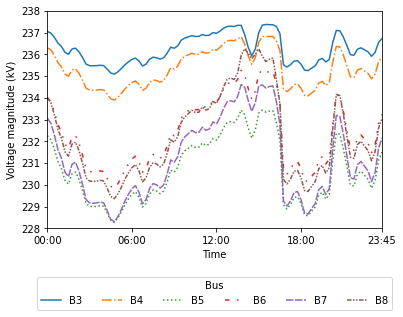

In [104]:
import matplotlib.pyplot as plt
import matplotlib

vm_pu.rename(columns={i:n for i, n in zip(net.bus.index.values, net.bus.name.values)}, inplace=True)

ax= plt.plot(230*vm_pu.iloc[:,2:3], label ='B3',linestyle='solid' )
ax= plt.plot(230*vm_pu.iloc[:,3:4], label ='B4',linestyle='dashdot' )
ax= plt.plot(230*vm_pu.iloc[:,4:5], label ='B5',linestyle='dotted' )
ax= plt.plot(230*vm_pu.iloc[:,5:6], label ='B6',linestyle=(0, (3, 5, 1, 5, 1, 5)))
ax= plt.plot(230*vm_pu.iloc[:,6:7], label ='B7',linestyle=(0, (5, 1)) )
ax= plt.plot(230*vm_pu.iloc[:,7:8], label ='B8',linestyle=(0, (3, 1, 1, 1, 1, 1)) )


plt.ylabel("Voltage magnitude (kV)")
plt.xlabel("Time")
plt.legend(title = "Bus", ncol=6, bbox_to_anchor=(0.5,-0.2), loc="upper center")


plt.xscale('linear')

locs, labels = plt.xticks()
locs = np.array([-24,   0,  24,  48,  72,  95])
labels = ['00:00','00:00','06:00','12:00','18:00',"23:45"]
plt.xticks(locs, labels)
plt.xlim([0, 95])
plt.ylim([228, 238])

ax = plt.gca()
ax.set_yticks(np.arange(228,239,1))


#plt.savefig('C:\\Users\\malfakhouri\\pandapower\\tutorials\\facts\\Case_study.pdf', bbox_inches='tight')
plt.show()

## SVC use case 

In [105]:
pp.create_shunt(net, 6, 0, 0, 230)
net2 = net.deepcopy()
net.shunt["controllable"] = True
net.shunt["set_vm_pu"] = 1.0
net.shunt["thyristor_firing_angle_degree"] = 170.
net.shunt["svc_x_l_ohm"] = 10
net.shunt["svc_x_cvar_ohm"] = 5
pp.runpp(net)


hp.pandapower.auxiliary - WARNING: numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



In [106]:
ow = OutputWriter(net, time_steps, output_path=None)
ow.log_variable("res_bus", "vm_pu")
run_timeseries(net, time_steps=time_steps, continue_on_divergence=True)

hp.pandapower.io_utils - INFO: Updating output_writer with index 0
  0%|                                                                                           | 0/96 [00:00<?, ?it/s]hp.pandapower.auxiliary - WARNING: numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

100%|██████████████████████████████████████████████████████████████████████████████████| 96/96 [00:02<00:00, 44.43it/s]


In [107]:
vm_pu = ow.output["res_bus.vm_pu"]

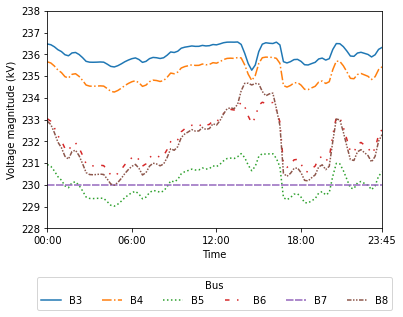

In [108]:
import matplotlib.pyplot as plt
import matplotlib
vm_pu.rename(columns={i:n for i, n in zip(net.bus.index.values, net.bus.name.values)}, inplace=True)


ax1= plt.plot(230*vm_pu.iloc[:,2:3], label ='B3',linestyle='solid' )
ax1= plt.plot(230*vm_pu.iloc[:,3:4], label ='B4',linestyle='dashdot' )
ax1= plt.plot(230*vm_pu.iloc[:,4:5], label ='B5',linestyle='dotted' )
ax1= plt.plot(230*vm_pu.iloc[:,5:6], label ='B6',linestyle=(0, (3, 5, 1, 5, 1, 5)))
ax1= plt.plot(230*vm_pu.iloc[:,6:7], label ='B7',linestyle=(0, (5, 1)) )
ax1= plt.plot(230*vm_pu.iloc[:,7:8], label ='B8',linestyle=(0, (3, 1, 1, 1, 1, 1)) )

plt.ylabel("Voltage magnitude (kV)")
plt.xlabel("Time")
plt.legend(title = "Bus", ncol=6, bbox_to_anchor=(0.5,-0.2), loc="upper center")


plt.xscale('linear')

locs, labels = plt.xticks()
locs = np.array([-24,   0,  24,  48,  72,  95])
labels = ['00:00','00:00','06:00','12:00','18:00',"23:45"]

plt.xticks(locs, labels)
plt.xlim([0, 95])
plt.ylim([228, 238])

ax1 = plt.gca()
ax1.set_yticks(np.arange(228,239,1))

#plt.savefig('C:\\Users\\malfakhouri\\pandapower\\tutorials\\facts\\Case_study_SVC.pdf', bbox_inches='tight')
plt.show()

hp.pandapower.auxiliary - WARNING: numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

  0%|                                                                                           | 0/96 [00:00<?, ?it/s]hp.pandapower.auxiliary - WARNING: numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

100%|█████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 102.09it/s]
hp.pandapower.auxiliary - WARNING: numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid thi

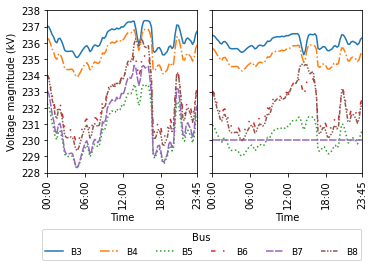

In [109]:
import pandas as pd
import pandapower as pp
from pandapower.test.loadflow.test_facts import facts_case_study_grid
import os
import numpy as np
import tempfile
import matplotlib.pyplot as plt
import matplotlib
from pandapower.timeseries import DFData
from pandapower.timeseries import OutputWriter
from pandapower.timeseries.run_time_series import run_timeseries
from pandapower.control import ConstControl

net = facts_case_study_grid() 

wind_profile = pd.read_csv(r"facts/facts_case_study_wind_profile.csv", index_col=0)
time_steps = wind_profile.index.values
wind_ds = DFData(wind_profile)
ConstControl(net, element='gen', variable='p_mw', element_index=net.gen.index,
             data_source=wind_ds, profile_name=["wind_power_mw"])
ow = OutputWriter(net, time_steps, output_path=None)
ow.log_variable("res_bus", "vm_pu")
run_timeseries(net, time_steps, continue_on_divergence=False)
vm_pu = ow.output["res_bus.vm_pu"]

fig, (ax,ax1) = plt.subplots(nrows=1, ncols=2, sharey=True,sharex=True,figsize=(5, 3))


vm_pu.rename(columns={i:n for i, n in zip(net.bus.index.values, net.bus.name.values)}, inplace=True)


ax.plot(230*vm_pu.iloc[:,2:3],linestyle='solid' )
ax.plot(230*vm_pu.iloc[:,3:4],linestyle='dashdot' )
ax.plot(230*vm_pu.iloc[:,4:5],linestyle='dotted' )
ax.plot(230*vm_pu.iloc[:,5:6], linestyle=(0, (3, 5, 1, 5, 1, 5)))
ax.plot(230*vm_pu.iloc[:,6:7], linestyle=(0, (5, 1)) )
ax.plot(230*vm_pu.iloc[:,7:8],linestyle=(0, (3, 1, 1, 1, 1, 1)) )


ax.set_ylabel("Voltage magnitude (kV)")
ax.set_xlabel("Time")
#ax.legend(title = "Bus", ncol=6, bbox_to_anchor=(1,-0.2), loc="upper center")

ax1.set_xlabel("Time")

ax.xaxis.set_tick_params(rotation=90)


#plt.xscale('linear')

locs, labels = plt.xticks()
locs = np.array([-24,   0,  24,  48,  72,  95])
labels = ['00:00','00:00','06:00','12:00','18:00',"23:45"]

plt.xticks(locs, labels)
plt.xlim([0, 95])
plt.ylim([228, 238])

ax.set_yticks(np.arange(228,239,1))

#plt.savefig('C:\\Users\\malfakhouri\\pandapower\\tutorials\\facts\\Case_study.pdf', bbox_inches='tight')
#plt.show()

pp.create_shunt(net, 6, 0, 0, 230)
net2 = net.deepcopy()
net.shunt["controllable"] = True
net.shunt["set_vm_pu"] = 1.0
net.shunt["thyristor_firing_angle_degree"] = 170.
net.shunt["svc_x_l_ohm"] = 10
net.shunt["svc_x_cvar_ohm"] = 5
pp.runpp(net)

ow = OutputWriter(net, time_steps, output_path=None)
ow.log_variable("res_bus", "vm_pu")
run_timeseries(net, time_steps=time_steps, continue_on_divergence=True)
vm_pu1 = ow.output["res_bus.vm_pu"]

vm_pu1.rename(columns={i:n for i, n in zip(net.bus.index.values, net.bus.name.values)}, inplace=True)

ax1.plot(230*vm_pu1.iloc[:,2:3], label ='B3',linestyle='solid' )
ax1.plot(230*vm_pu1.iloc[:,3:4], label ='B4',linestyle='dashdot' )
ax1.plot(230*vm_pu1.iloc[:,4:5], label ='B5',linestyle='dotted' )
ax1.plot(230*vm_pu1.iloc[:,5:6], label ='B6',linestyle=(0, (3, 5, 1, 5, 1, 5)))
ax1.plot(230*vm_pu1.iloc[:,6:7], label ='B7',linestyle=(0, (5, 1)) )
ax1.plot(230*vm_pu1.iloc[:,7:8], label ='B8',linestyle=(0, (3, 1, 1, 1, 1, 1)) )

ax1.set_yticks(np.arange(228,239,1))
fig.legend(title = "Bus", ncol=6, fontsize = 9 , bbox_to_anchor=(0.54,-0.01), loc="upper center")

ax1.xaxis.set_tick_params(rotation=90)

plt.tight_layout(w_pad=0.5,h_pad=0,pad=0)

plt.savefig('C:\\Users\\malfakhouri\\pandapower\\tutorials\\facts\\Benchmark_SVC.pdf', bbox_inches='tight')


#plt.show()
